# **Libraries**

In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

# **Import EMG Feature (CSV file)**

In [46]:
df = pd.read_csv(r"C:\Users\hpalm\Desktop\Programacion\Proyecto_de_grado\Codigo_caracteristicas\Features_EMG_P01.csv")

In [47]:
df

,EMAV,EWL,MAV,WL,ZC,SSC,RMS,AAC,DASDV,LD,MMAV,MMAV2,MYOP,SSI,VAR,WAMP,MFL,Label
0,0.000569,0.206534,0.000002,0.000515,99,0,0.000002,1.031368e-06,0.000001,0.002665,0.000001,0.000001,1.726,2.165863e-09,4.331534e-12,0,-4.514744,0
1,0.000616,0.216262,0.000002,0.000583,93,2,0.000003,1.167507e-06,0.000002,0.002852,0.000002,0.000002,0.858,3.278680e-09,6.551368e-12,423,-4.417534,0
2,0.000613,0.228495,0.000002,0.000615,99,7,0.000002,1.232243e-06,0.000002,0.002759,0.000001,0.000001,0.000,3.057061e-09,6.105849e-12,1312,-4.386639,0
3,0.000661,0.227736,0.000004,0.000957,105,7,0.000008,1.917174e-06,0.000004,0.003204,0.000003,0.000003,1.750,3.457190e-08,6.914370e-11,830,-4.001613,0
4,0.000549,0.225940,0.000002,0.000620,124,0,0.000002,1.242128e-06,0.000002,0.002732,0.000001,0.000001,0.464,2.838227e-09,5.615190e-12,0,-4.441027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.000646,0.215896,0.000002,0.000492,77,0,0.000003,9.862513e-07,0.000001,0.002782,0.000002,0.000002,0.000,3.518607e-09,6.979933e-12,0,-4.565234,5
10196,0.000629,0.202249,0.000002,0.000497,73,0,0.000003,9.957700e-07,0.000001,0.002958,0.000002,0.000002,0.000,3.407885e-09,6.811655e-12,0,-4.553725,5
10197,0.000752,0.228741,0.000003,0.000644,64,0,0.000004,1.289650e-06,0.000002,0.003252,0.000002,0.000002,0.000,7.816880e-09,1.558520e-11,0,-4.441204,5
10198,0.000663,0.197919,0.000002,0.000448,64,0,0.000003,8.981024e-07,0.000001,0.002994,0.000002,0.000002,0.730,4.168233e-09,8.330965e-12,0,-4.600838,5


# **Correlation matrix between the 17 features**

In [48]:
cols = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','WAMP','MFL']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,17)].values)

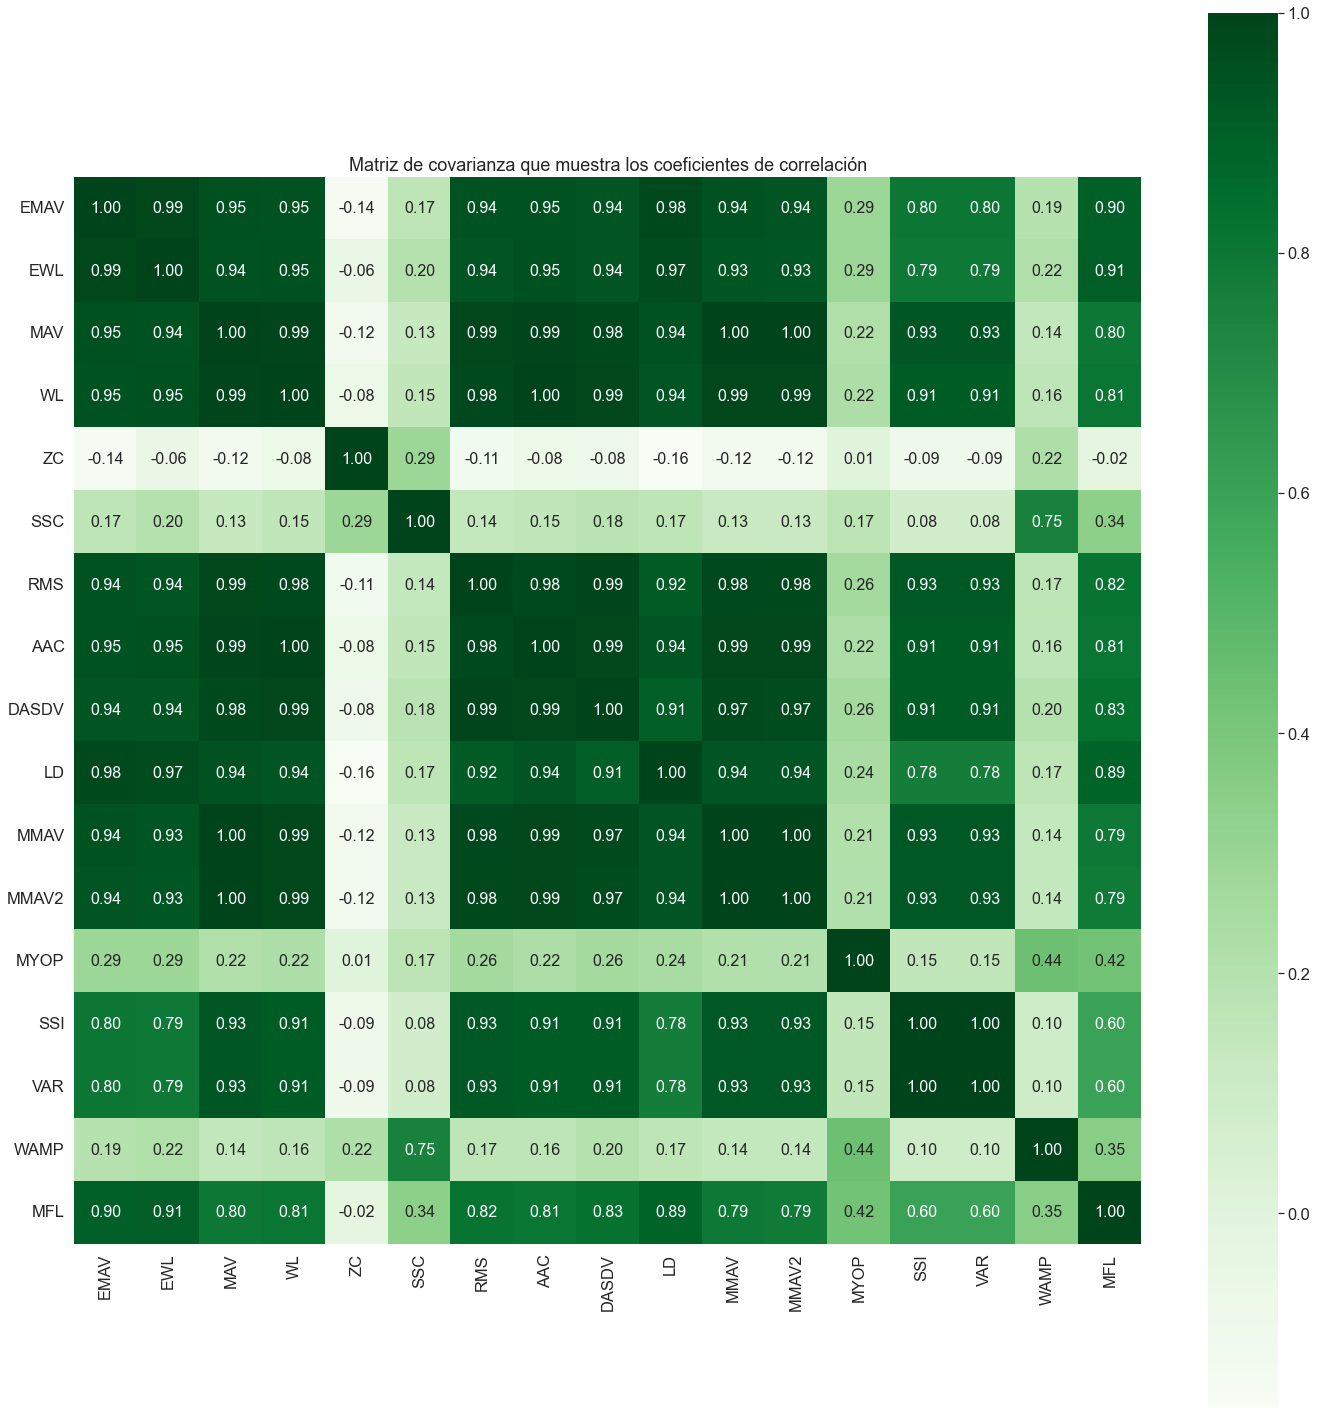

In [49]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=cols,
                 xticklabels=cols,
                 cmap="Greens")

plt.title('Matriz de covarianza que muestra los coeficientes de correlación')
plt.tight_layout()
plt.show()

In [50]:
# choose 5 feature to train according to the correlation matrix

cols_selected = ['MAV', 'ZC', 'SSC','MYOP','WAMP']

In [51]:
df[cols_selected].head()

,MAV,ZC,SSC,MYOP,WAMP
0,0.000002,99,0,1.726,0
1,0.000002,93,2,0.858,423
2,0.000002,99,7,0.000,1312
3,0.000004,105,7,1.750,830
4,0.000002,124,0,0.464,0


# **Train and Test set**

In [52]:
X = df.iloc[:,[2,4,5,12,15]].values    # features matrix 
y = df.iloc[:,[17]].values        # target variable

In [53]:
# Split data into train, test and validatio sets 

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=0, stratify=y)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,test_size=0.2,random_state=0, stratify=y_train)

print('Testing data shape : ', X_test.shape, y_test.shape)
print('Training data shape : ', X_train.shape, y_train.shape)
print('validation data shape : ', X_val.shape, y_val.shape)

Testing data shape :  (2040, 5) (2040, 1)
Training data shape :  (6528, 5) (6528, 1)
validation data shape :  (1632, 5) (1632, 1)


# **Build ANN and train**

In [54]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape = (5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 4,934
Trainable params: 4,934
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [57]:
# train the ANN model
model_train = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_val,y_val)) 

Epoch 1/100
204/204 [==============================] - 1s 2ms/step - loss: 6.0342 - accuracy: 0.2978 - val_loss: 2.6511 - val_accuracy: 0.3168
Epoch 2/100
204/204 [==============================] - 0s 1ms/step - loss: 2.6261 - accuracy: 0.3157 - val_loss: 3.7087 - val_accuracy: 0.3113
Epoch 3/100
204/204 [==============================] - 0s 1ms/step - loss: 2.6029 - accuracy: 0.3154 - val_loss: 2.5491 - val_accuracy: 0.3217
Epoch 4/100
204/204 [==============================] - 0s 1ms/step - loss: 2.6667 - accuracy: 0.3128 - val_loss: 2.0982 - val_accuracy: 0.3107
Epoch 5/100
204/204 [==============================] - 0s 1ms/step - loss: 2.6487 - accuracy: 0.3192 - val_loss: 2.6546 - val_accuracy: 0.3088
Epoch 6/100
204/204 [==============================] - 0s 1ms/step - loss: 2.8915 - accuracy: 0.3176 - val_loss: 1.7865 - val_accuracy: 0.3143
Epoch 7/100
204/204 [==============================] - 0s 1ms/step - loss: 2.4225 - accuracy: 0.3263 - val_loss: 2.8957 - val_accuracy: 0.3125

In [58]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1])) 

Train loss: 1.4374353885650635, Train accuracy: 0.33961397409439087
Test loss: 1.4384807348251343, Test accuracy: 0.33725491166114807


# **Confusion Matrix**

In [72]:
predicted_classes2 = model.predict(X_test)

In [65]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [69]:
#rounded_labels = np.argmax(test_Y, axis=1)
rounded_labels = y_test
rounded_labels[5]

array([4], dtype=int64)

In [73]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(rounded_labels,predicted_classes)

In [77]:
cm

array([[ 65, 140,   0,   4, 105,  26],
       [ 37, 182,   0,   7,  88,  26],
       [ 32, 188,   0,   6,  80,  34],
       [ 24, 177,   0,   6, 106,  27],
       [ 61, 151,   0,   3,  99,  26],
       [  3,   1,   0,   0,   0, 336]], dtype=int64)

In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],'.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.savefig(r'', transparent = False, bbox_inches = 'tight')

Confusion matrix, without normalization
[[ 65 140   0   4 105  26]
 [ 37 182   0   7  88  26]
 [ 32 188   0   6  80  34]
 [ 24 177   0   6 106  27]
 [ 61 151   0   3  99  26]
 [  3   1   0   0   0 336]]


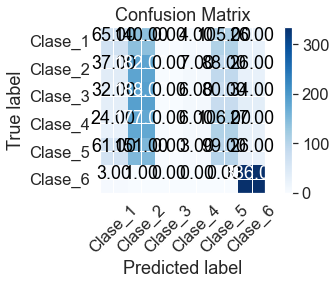

In [79]:
cm_plot_labels = ['Clase_1','Clase_2','Clase_3','Clase_4','Clase_5','Clase_6']
plot_confusion_matrix(cm,cm_plot_labels, title = 'Confusion Matrix')

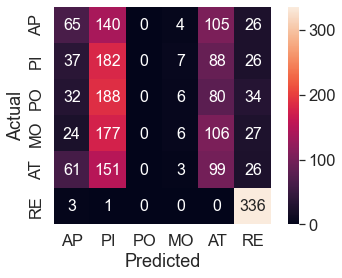

In [82]:
labels=["AP", "PI", "PO", "MO", "AT", "RE"] #Con Reposo
#labels=["AP", "PI", "PO", "MO", "AT"] #Sin Reposo
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=True, fmt='g')
ax.set_ylim(0, 6) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() 
plt.show()